# TensirFlow Mnist手写数字识别数据集

## 1 下载MNIST数据

In [14]:
import tensorflow as tf

In [15]:
#TensorFlow已经提供现成模块，可用于下载并读取MNIST数据
import tensorflow.examples.tutorials.mnist.input_data as input_data

In [16]:
mnist = input_data.read_data_sets("data/MNIST_data/",one_hot=True)

Extracting data/MNIST_data/train-images-idx3-ubyte.gz
Extracting data/MNIST_data/train-labels-idx1-ubyte.gz
Extracting data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting data/MNIST_data/t10k-labels-idx1-ubyte.gz


In [17]:
#查看MNIST数据
print('train',mnist.train.num_examples,
     ',validation',mnist.validation.num_examples,
     ',test',mnist.test.num_examples)

train 55000 ,validation 5000 ,test 10000


## 2 查看训练数据

In [18]:
print('train images:',mnist.train.images.shape,
     'labels:',mnist.train.labels.shape)

train images: (55000, 784) labels: (55000, 10)


In [19]:
#查看第0项images图像的长度
len(mnist.train.images[0])

784

In [20]:
#查看第0项images图像的内容
mnist.train.images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

可以查看第0项images图像的内容，共有784个数值。TensorFlow已经进行标准化，数值都介于0~1之间，所以不需要再标准化。

In [21]:
#显示图像
import matplotlib.pyplot as plt
def plot_image(image):
    plt.imshow(image.reshape(28,28),cmap='binary')
    plt.show()

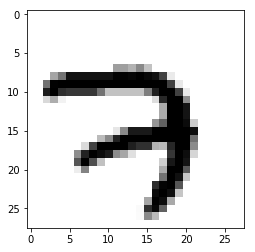

In [22]:
#执行plot_image函数
plot_image(mnist.train.images[0])           #显示训练数据集的第0项数据

In [23]:
#查看训练标签labels数据
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [24]:
#使用argmax显示数字
import numpy as np
np.argmax(mnist.train.labels[0])

7

## 3 查看多项训练数据images与labels

In [25]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num>25:
        num=25
    for i in range(0,num):
        ax = plt.subplot(5,5,1+i)
        #转换image字段
        ax.imshow(np.reshape(images[idx],(28,28)),cmap='binary')
        #转换labels字段
        title = "label="+str(np.argmax(labels[idx]))
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx])
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

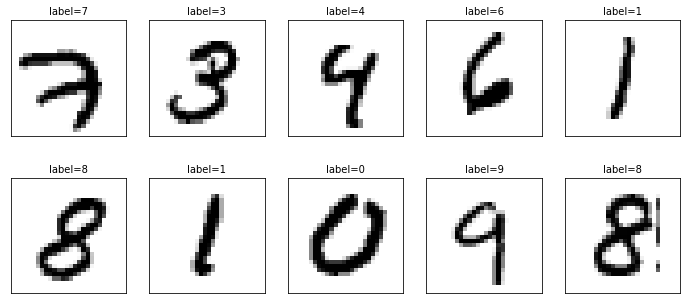

In [26]:
plot_images_labels_prediction(mnist.train.images,
                             mnist.train.labels,[],0)

In [27]:
#查看validation数据项数
print('validation images:',mnist.validation.images.shape,
     'labels:',mnist.validation.labels.shape)

validation images: (5000, 784) labels: (5000, 10)


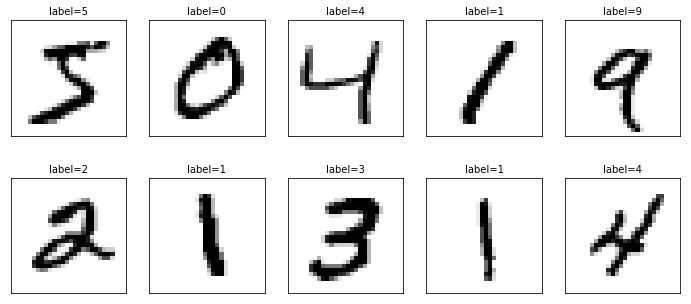

In [28]:
#查看validation数据
plot_images_labels_prediction(mnist.validation.images,mnist.validation.labels,[],0)

In [29]:
#查看test数据项数
print('test images:',mnist.test.images.shape,
     'labels:',mnist.test.labels.shape)

test images: (10000, 784) labels: (10000, 10)


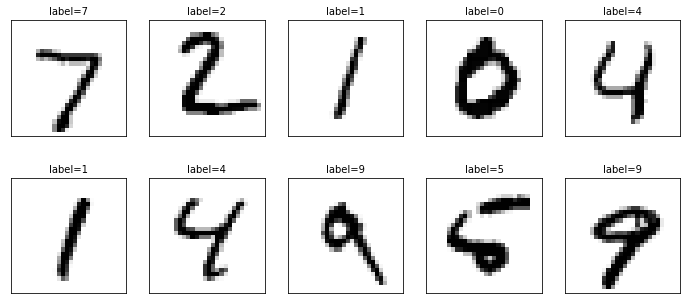

In [30]:
plot_images_labels_prediction(mnist.test.images,mnist.test.labels,[],0)

## 4 批次读取MNIST数据

进行深度学习网络训练时，可以不读取所有数据进行训练，而是读取批次数据（例如100项）进行训练。在TensorFlow MNIST模块中，提供了mnist.train.next_batch方法，可以按批次读取数据。

In [31]:
#每次读取100项批次训练数据
batch_images_xs,batch_labels_ys = mnist.train.next_batch(batch_size=100)

In [32]:
print(len(batch_images_xs),
     len(batch_labels_ys))

100 100


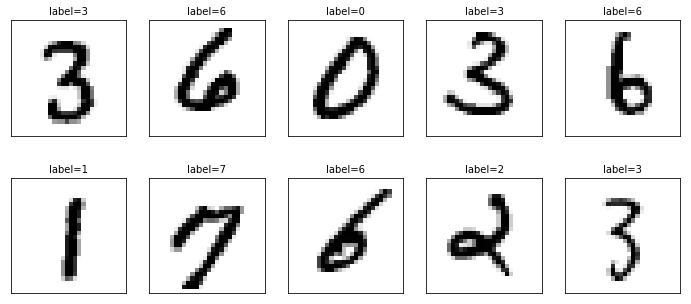

In [33]:
#查看批次数据
plot_images_labels_prediction(batch_images_xs,
                             batch_labels_ys,[],0)